In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
%matplotlib inline

In [2]:
def get_images(df, folder_dir='../../Test/'):
    im_name = df['test_name'].values[0]
    gt = os.path.join(folder_dir, im_name) + '_gt.png'
    pred = os.path.join(folder_dir, im_name) + '_pred.png'
    return imread(gt), imread(pred)

def show_images(im_gt, im_pred):
    f, axarr = plt.subplots(1,2)
    axarr[0].imshow(im_gt)
    axarr[1].imshow(im_pred)

In [3]:
folder_dir = '../../Test/'
df = pd.read_csv(os.path.join(folder_dir, 'test_scores.csv'), dtype={'test_name': str})
df.head()

,test_name,test_accuracy,precision,recall,f1 score,mean iou,bg,sclera,iris,pupil
0,000000199487,0.992781,0.992920,0.992781,0.992829,0.952276,0.998294,0.941590,0.973470,0.969516
1,000000199488,0.992598,0.992683,0.992598,0.992628,0.957035,0.997366,0.943082,0.978940,0.980896
2,000000199489,0.992781,0.992734,0.992781,0.992677,0.942008,0.996031,0.975587,0.965504,0.974778
3,000000199490,0.994496,0.994567,0.994496,0.994520,0.961329,0.998517,0.951763,0.982389,0.967529
4,000000199491,0.993895,0.993988,0.993895,0.993928,0.951486,0.998558,0.950302,0.980731,0.934925


## 2.263 imágenes

In [4]:
df.shape

(2263, 10)

In [5]:
df.rename(columns= lambda x: x.strip(), inplace=True) # algunos nombres de columnas tenian espacios
df.columns.values

array(['test_name', 'test_accuracy', 'precision', 'recall', 'f1 score',
       'mean iou', 'bg', 'sclera', 'iris', 'pupil'], dtype=object)

# mIoU

In [6]:
df['mean iou'].mean()

0.9277951581970837

# Min IoU

In [7]:
df[df['mean iou'] == df['mean iou'].min()]

,test_name,test_accuracy,precision,recall,f1 score,mean iou,bg,sclera,iris,pupil
1578,000000240750,0.904781,0.88362,0.904781,0.892783,0.28808,0.940136,0.315682,0.193072,0.111111


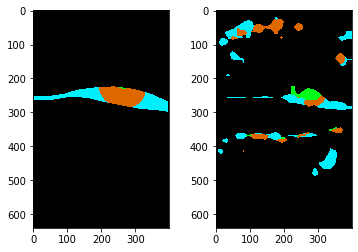

In [8]:
min_iou = df[df['mean iou'] == df['mean iou'].min()]
im_gt, im_pred = get_images(min_iou)
show_images(im_gt, im_pred)

# Max IoU

In [9]:
df[df['mean iou'] == df['mean iou'].max()]

,test_name,test_accuracy,precision,recall,f1 score,mean iou,bg,sclera,iris,pupil
1761,000000248844,0.993687,0.993761,0.993687,0.993697,0.972208,0.998086,0.983836,0.96499,0.9968


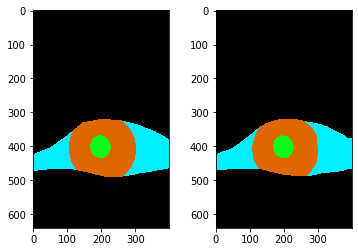

In [10]:
max_iou = df[df['mean iou'] == df['mean iou'].max()]
im_gt, im_pred = get_images(max_iou)
show_images(im_gt, im_pred)

# IoU $ \ge $ 0.5

In [11]:
print(f"Cantidad de imagenes con IoU > 0.75: {df[df['mean iou'] > .5].shape[0]}")

2256

# IoU $ \ge $ 0.75

In [17]:
print(f"Cantidad de imagenes con IoU > 0.75: {df[df['mean iou'] > .75].shape[0]}")

Cantidad de imagenes con iou > 0.75: 2171


# IoU $ \ge $ 0.90

In [16]:
print(f"Cantidad de imagenes con IoU > 0.90: {df[df['mean iou'] > .9].shape[0]}")

Cantidad de imagenes con iou > 0.90: 2044


# IoU $ \ge $ 0.95

In [15]:
print(f"Cantidad de imagenes con IoU > 0.95: {df[df['mean iou'] > .95].shape[0]}")

Cantidad de imagenes con iou > 0.95: 935
